Text(0.5,1,'Petal')

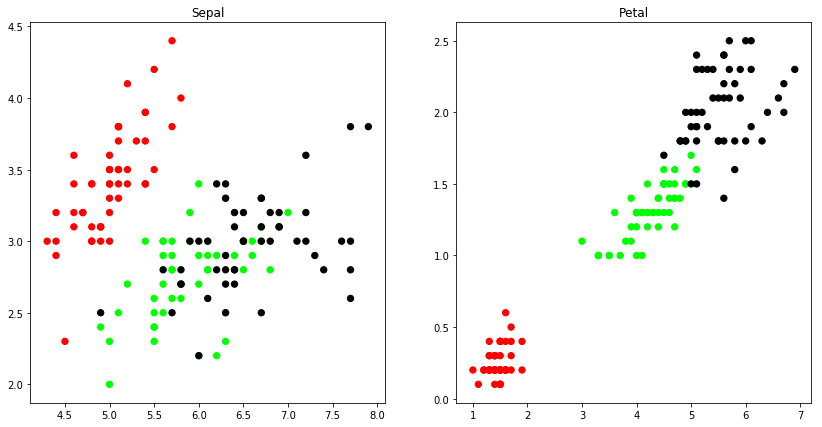

In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
import sklearn.metrics as sm 
import pandas as pd 
import numpy as np 
%matplotlib inline

# import some data to play with 
iris = datasets.load_iris() 
#print("\n IRIS DATA :",iris.data); 
#print("\n IRIS FEATURES :\n",iris.feature_names) 
#print("\n IRIS TARGET :\n",iris.target) 
#print("\n IRIS TARGET NAMES:\n",iris.target_names) 
# Store the inputs as a Pandas Dataframe and set the column names 
X = pd.DataFrame(iris.data) 

#print(X) 
X.columns = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']
#print(X.columns) 
#print("X:",X) 
#print("Y:",y) 
y = pd.DataFrame(iris.target) 
y.columns = ['Targets'] 

# Set the size of the plot 
plt.figure(figsize=(14,7)) 

# Create a colormap 
colormap = np.array(['red', 'lime', 'black']) 
# Plot Sepal 
plt.subplot(1, 2, 1) 
plt.scatter(X.Sepal_Length,X.Sepal_Width, c=colormap[y.Targets], s=40) 
plt.title('Sepal') 

plt.subplot(1, 2, 2) 
plt.scatter(X.Petal_Length,X.Petal_Width, c=colormap[y.Targets], s=40) 
plt.title('Petal')

In [2]:
# K Means Cluster 
model = KMeans(n_clusters=3) 
model.fit(X) 
# This is what KMeans thought 
model.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

Text(0.5,1,'K Mean Classification')

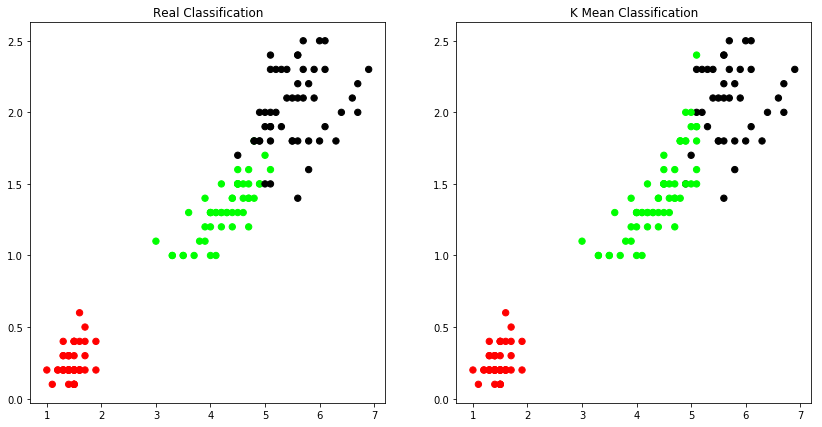

In [3]:
# View the results 
# Set the size of the plot 
plt.figure(figsize=(14,7)) 
# Create a colormap 
colormap = np.array(['red', 'lime', 'black']) 
# Plot the Original Classifications 
plt.subplot(1, 2, 1) 
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[y.Targets], s=40) 
plt.title('Real Classification') 
# Plot the Models Classifications 
plt.subplot(1, 2, 2) 
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[model.labels_], s=40) 
plt.title('K Mean Classification')

In [4]:
# The fix, we convert all the 1s to 0s and 0s to 1s. 
predY = np.choose(model.labels_, [0, 1, 2]).astype(np.int64) 
print (predY)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


Text(0.5,1,'K Mean Classification')

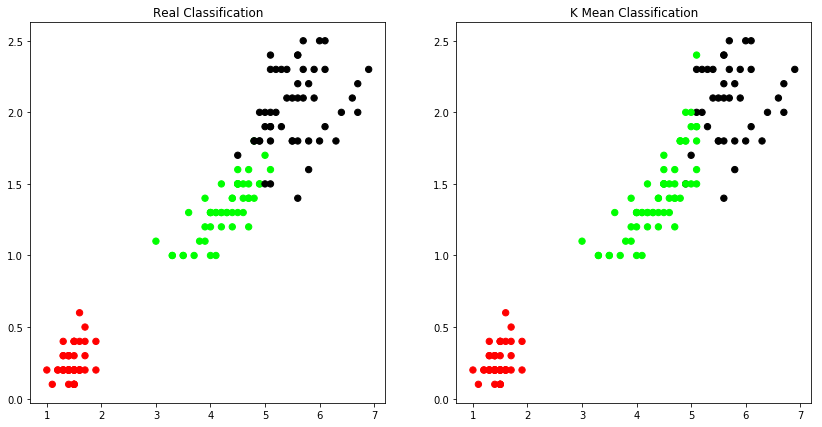

In [5]:
# View the results 
# Set the size of the plot 
plt.figure(figsize=(14,7))
# Create a colormap 
colormap = np.array(['red', 'lime', 'black']) 
# Plot Orginal
plt.subplot(1, 2, 1) 
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[y.Targets], s=40) 
plt.title('Real Classification') 
# Plot Predicted with corrected values 
plt.subplot(1, 2, 2) 
plt.scatter(X.Petal_Length,X.Petal_Width, c=colormap[predY], s=40) 
plt.title('K Mean Classification')

In [6]:
sm.accuracy_score(y, model.labels_)

0.8933333333333333

In [7]:
# Confusion Matrix 
sm.confusion_matrix(y, model.labels_)

array([[50,  0,  0],
       [ 0, 48,  2],
       [ 0, 14, 36]], dtype=int64)

In [8]:
from sklearn import preprocessing 
scaler = preprocessing.StandardScaler() 
scaler.fit(X) 
xsa = scaler.transform(X) 
xs = pd.DataFrame(xsa, columns = X.columns) 
xs.sample(5)

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
18,-0.173674,1.726266,-1.170675,-1.181504
5,-0.537178,1.957669,-1.170675,-1.050031
110,0.795669,0.337848,0.762759,1.053537
145,1.038005,-0.124958,0.819624,1.447956
128,0.674501,-0.587764,1.047087,1.185010


In [9]:
from sklearn.mixture import GaussianMixture 
gmm = GaussianMixture(n_components=3) 
gmm.fit(xs)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=3, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

In [10]:
y_cluster_gmm = gmm.predict(xs) 
y_cluster_gmm

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

Text(0.5,1,'GMM Classification')

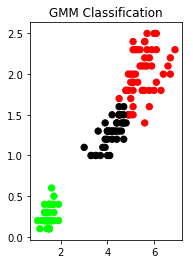

In [11]:
plt.subplot(1, 2, 1) 
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[y_cluster_gmm], s=40) 
plt.title('GMM Classification')

In [12]:
sm.accuracy_score(y, y_cluster_gmm)

0.0

In [13]:
# Confusion Matrix 
sm.confusion_matrix(y, y_cluster_gmm)

array([[ 0, 50,  0],
       [ 5,  0, 45],
       [50,  0,  0]], dtype=int64)

In [14]:
print('so the GMM clustering matched the true labels more closely than the Kmeans, # as expected from the plots.')

so the GMM clustering matched the true labels more closely than the Kmeans, # as expected from the plots.
